In [6]:
import numpy as np
from DS3 import DS3
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import cm
import time

# Generate and Plot Synthetic Data Samples

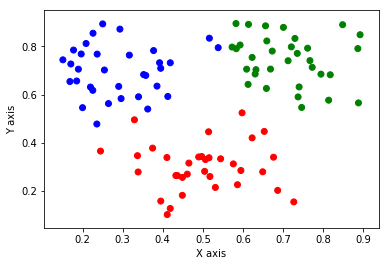

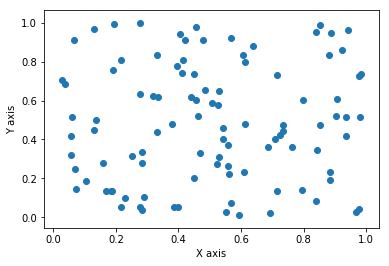

In [7]:
n_samples = 100
n_bins = 3

centers = [(0.5, 0.3), (0.7, 0.7), (0.3, 0.7)]

X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.1,
                  centers=centers, shuffle=False, random_state=0)

# sample_weight = np.random.RandomState(42).rand(y.shape[0])


colors = ['r','g','b']
c = []
for i in y:
    c.append(colors[i])

plt.scatter(X[:, 0], X[:, 1], c= c)
plt.gray()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# ...........................................................................

X_ran = np.random.uniform(0,1,size=(100,2))
# print(datapoints)
plt.scatter(X_ran[:,0],X_ran[:,1])
plt.gray()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

# Calculate Dissimilarity Matrix

In [8]:
[N,D] = X.shape
# print(N, D)
dis_matrix = np.zeros((N, N))
# print(dis_matrix.shape)

for i in range(len(X)):
    for j in range(len(X)):
        dis_matrix[i, j] = np.linalg.norm((X[i] - X[j]), 2)

# ..............................................................

[N,D] = X_ran.shape
# print(N, D)
dis_matrix_ran = np.zeros((N, N))
# print(dis_matrix.shape)

for i in range(len(X_ran)):
    for j in range(len(X_ran)):
        dis_matrix_ran[i, j] = np.linalg.norm((X_ran[i] - X_ran[j]), 2)



# Run DS3 for Lambda = {0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100}

In [15]:
# output for Message Passing algorithm for damp = 0.6
damp1 = 0.6
DataMsg1 = [] 
NMsg1 = [] 
fMsg1 = []
t1 = []

# output for Message Passing algorithm for damp = 0.4
damp2 = 0.4
DataMsg2 = [] 
NMsg2 = [] 
fMsg2 = []
t2 = []

# output for Message Passing algorithm for damp = 0.5
damp3 = 0.5
DataMsg3 = [] 
NMsg3 = [] 
fMsg3 = []
t3 = []

# output for Message Passing algorithm for damp = 0.7
damp4 = 0.7
DataMsg4 = [] 
NMsg4 = [] 
fMsg4 = []
t4 = []

# output for Message Passing algorithm for damp = 0.9
damp5 = 0.9
DataMsg5 = [] 
NMsg5 = [] 
fMsg5 = []
t5 = []

# output for Greedy Deterministic algorithm.
DataGreedyD = []
NGreedyD = [] 
fGrD = []
t6 = []

# output for Greedy Randomized algorithm.
DataGreedyR = []
NGreedyR = [] 
fGrR = [] 
t7 = []

# output for ADMM algorithm for L2.
DataAdmmL2 = [] 
NAdmmL2 = [] 
fAdmmL2 = []
t8 = []

# output for ADMM algorithm for Linf.
DataAdmmLinf = [] 
NAdmmLinf = [] 
fAdmmLinf = []
t9 = []

In [ ]:
for reg in range(0,110,10):
    DS = DS3(dis_matrix, reg)
    print("Running Message Passing algorithm for damp = 0.6...")
    start = time.time()
    D, M, F = DS.messagePassing(damp=damp1, max_iter=5000)
    end = time.time()
    DataMsg1.append(D)
    NMsg1.append(M)
    fMsg1.append(F)
    t1.append(start - end)
    print("Algorithm ran successfully")
    print("................................................................")
    print("Running Message Passing algorithm for damp = 0.4...")
    start = time.time()
    D, M, F = DS.messagePassing(damp=damp2, max_iter=5000)
    end = time.time()
    DataMsg2.append(D)
    NMsg2.append(M)
    fMsg2.append(F)
    t2.append(start - end)
    print("Algorithm ran successfully")
    print("................................................................")
    print("Running Message Passing algorithm for damp = 0.5...")
    start = time.time()
    D, M, F = DS.messagePassing(damp=damp3, max_iter=5000)
    end = time.time()
    DataMsg3.append(D)
    NMsg3.append(M)
    fMsg3.append(F)
    t3.append(start - end)
    print("Algorithm ran successfully")
    print("................................................................")
    print("Running Message Passing algorithm for damp = 0.7...")
    start = time.time()
    D, M, F = DS.messagePassing(damp=damp4, max_iter=5000)
    end = time.time()
    DataMsg4.append(D)
    NMsg4.append(M)
    fMsg4.append(F)
    t4.append(start - end)
    print("Algorithm ran successfully")
    print("................................................................")
    print("Running Message Passing algorithm for damp = 0.9...")
    start = time.time()
    D, M, F = DS.messagePassing(damp=0.5, max_iter=5000)
    end = time.time()
    DataMsg5.append(D)
    NMsg5.append(M)
    fMsg5.append(F)
    t5.append(start - end)
    print("Algorithm ran successfully")
    print("................................................................")
    print("Running Greedy algorithm...")
    start = time.time()
    D, M, F = DS.greedyDeterministic()
    end = time.time()
    DataGreedyD.append(D)
    NGreedyD.append(M)
    fGrD.append(F)
    t6.append(start - end)
    start = time.time()
    D, M, F = DS.greedyRandomized()
    end = time.time()
    DataGreedyR.append(D)
    NGreedyR.append(M)
    fGrR.append(F)
    t7.append(start - end)
    print("Algorithm ran successfully")
    print("................................................................")
    print("Running ADMM algorithm for L2...")
    start = time.time()
    D, M, F = DS.ADMM(mu=10**-1, epsilon=10**-7, max_iter=1000, p=2)
    end = time.time()
    DataAdmmL2.append(D)
    NAdmmL2.append(M)
    fAdmmL2.append(F)
    t8.append(start - end)
    print("................................................................")
    print("Running ADMM algorithm for Linf...")
    start = time.time()
    D, M, F = DS.ADMM(mu=10**-1, epsilon=10**-7, max_iter=1000, p=np.inf)
    end = time.time()
    DataAdmmLinf.append(D)
    NAdmmLinf.append(M)
    fAdmmLinf.append(F)
    t9.append(start - end)
    print("Algorithm ran successfully")

Running Message Passing algorithm for damp = 0.6...
Iteration :  1
factors msg sent
variable msg sent
Iteration :  2
factors msg sent
variable msg sent
Iteration :  3
factors msg sent
variable msg sent
Iteration :  4
factors msg sent
variable msg sent
Iteration :  5
factors msg sent
variable msg sent
Iteration :  6
factors msg sent
variable msg sent
Iteration :  7
factors msg sent
variable msg sent
Iteration :  8
factors msg sent
variable msg sent
Iteration :  9
factors msg sent
variable msg sent
Iteration :  10
factors msg sent
variable msg sent
Iteration :  11
factors msg sent
variable msg sent
Iteration :  12
factors msg sent
variable msg sent
Iteration :  13
factors msg sent
variable msg sent
Iteration :  14
factors msg sent
variable msg sent
Iteration :  15
factors msg sent
variable msg sent
Iteration :  16
factors msg sent
variable msg sent
Iteration :  17
factors msg sent
variable msg sent
Iteration :  18
factors msg sent
variable msg sent
Iteration :  19
factors msg sent
variab

itreation :  64
itreation :  65
itreation :  66
itreation :  67
itreation :  68
itreation :  69
itreation :  70
itreation :  71
itreation :  72
itreation :  73
itreation :  74
itreation :  75
itreation :  76
itreation :  77
itreation :  78
itreation :  79
itreation :  80
itreation :  81
itreation :  82
itreation :  83
itreation :  84
itreation :  85
itreation :  86
itreation :  87
itreation :  88
itreation :  89
itreation :  90
itreation :  91
itreation :  92
itreation :  93
itreation :  94
itreation :  95
itreation :  96
itreation :  97
itreation :  98
itreation :  99
itreation :  100
Algorithm ran successfully
................................................................
Running ADMM algorithm for L2...
iteration :  1
100
(100, 1)
iteration :  2
100
(100, 1)
................................................................
Running ADMM algorithm for Linf...
iteration :  1
100
iteration :  2
100
Algorithm ran successfully
Running Message Passing algorithm for damp = 0.6...
Iteration

factors msg sent
variable msg sent
Iteration :  48
factors msg sent
variable msg sent
Iteration :  49
factors msg sent
variable msg sent
Iteration :  50
factors msg sent
variable msg sent
Iteration :  51
factors msg sent
variable msg sent
Iteration :  52
factors msg sent
variable msg sent
Iteration :  53
factors msg sent
variable msg sent
Iteration :  54
factors msg sent
variable msg sent
Iteration :  55
factors msg sent
variable msg sent
Iteration :  56
factors msg sent
variable msg sent
Iteration :  57
factors msg sent
variable msg sent
Iteration :  58
factors msg sent
variable msg sent
Iteration :  59
factors msg sent
variable msg sent
Iteration :  60
factors msg sent
variable msg sent
Iteration :  61
factors msg sent
variable msg sent
Iteration :  62
factors msg sent
variable msg sent
Iteration :  63
factors msg sent
variable msg sent
Iteration :  64
factors msg sent
variable msg sent
Iteration :  65
factors msg sent
variable msg sent
Iteration :  66
factors msg sent
variable msg s

factors msg sent
variable msg sent
Iteration :  207
factors msg sent
variable msg sent
Iteration :  208
factors msg sent
variable msg sent
Iteration :  209
factors msg sent
variable msg sent
Iteration :  210
factors msg sent
variable msg sent
Iteration :  211
factors msg sent
variable msg sent
Iteration :  212
factors msg sent
variable msg sent
Iteration :  213
factors msg sent
variable msg sent
Iteration :  214
factors msg sent
variable msg sent
Iteration :  215
factors msg sent
variable msg sent
Iteration :  216
factors msg sent
variable msg sent
Iteration :  217
factors msg sent
variable msg sent
Iteration :  218
factors msg sent
variable msg sent
Iteration :  219
factors msg sent
variable msg sent
Iteration :  220
factors msg sent
variable msg sent
Iteration :  221
factors msg sent
variable msg sent
Iteration :  222
factors msg sent
variable msg sent
Algorithm ran successfully
................................................................
Running Message Passing algorithm for dam

factors msg sent
variable msg sent
Iteration :  142
factors msg sent
variable msg sent
Iteration :  143
factors msg sent
variable msg sent
Iteration :  144
factors msg sent
variable msg sent
Iteration :  145
factors msg sent
variable msg sent
Iteration :  146
factors msg sent
variable msg sent
Iteration :  147
factors msg sent
variable msg sent
Iteration :  148
factors msg sent
variable msg sent
Iteration :  149
factors msg sent
variable msg sent
Iteration :  150
factors msg sent
variable msg sent
Iteration :  151
factors msg sent
variable msg sent
Iteration :  152
factors msg sent


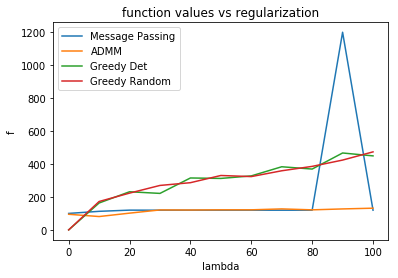

[94.76072652381472, 81.06372254357163, 101.67972494323304, 121.11824689667165, 120.7103655245514, 121.72665148838178, 121.8147757035123, 127.34068738045227, 121.66300038569244, 127.21015301155305, 131.70987158757023]


In [16]:
flag = 0
yMsg = []
yGrD = []
yGrR = []
yAdmm = []
for i in range(len(fMsg)):
    if flag == 0:
        yMsg.append(fMsg[i])
        flag = 1
    elif flag == 1:
        yGrD.append(-fMsg[i])
        flag = 2
    elif flag == 2:
        yGrR.append(-fMsg[i])
        flag = 3
    else:
        yAdmm.append(fMsg[i])
        flag = 0
        
reg = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.plot(reg, yMsg, label = "Message Passing")
  
plt.plot(reg, yAdmm, label = "ADMM")

plt.plot(reg, yGrD, label = "Greedy Det")

plt.plot(reg, yGrR, label = "Greedy Random")
 
plt.xlabel('lambda')

plt.ylabel('f')

plt.title('function values vs regularization')
 
plt.legend()
plt.show()
print(yAdmm)

In [17]:
print(yMsg)

[100.0, 112.6824489562067, 119.91536948571411, 119.50748811359387, 119.50748811359387, 119.50748811359387, 119.50748811359387, 119.50748811359387, 119.50748811359387, 1198.1033588561688, 119.50748811359387]


# Lambda = 0

In [18]:
print("Message Passing:", DataMsg[0])
print("Greedy Deterministic:", DataMsg[1])
print("Greedy Randomized:", DataMsg[2])
print("ADMM:", DataMsg[3])

Message Passing: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Message Passing: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Message Passing: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 

# Lambda = 10

In [19]:
print("Message Passing:", DataMsg[4])
print("Greedy Deterministic:", DataMsg[5])
print("Greedy Randomized:", DataMsg[6])
print("ADMM:", DataMsg[7])

Message Passing: [12, 49, 77, 92]
Greedy Deterministic: [22, 27, 44, 49, 87, 90]
Greedy Randomized: [11, 33, 39, 64, 73, 80, 90]
ADMM: [2, 6, 26, 27, 52, 63, 64, 75, 84, 91]


# Lambda = 100

In [20]:
print("Message Passing:", DataMsg[40])
print("Greedy Deterministic:", DataMsg[41])
print("Greedy Randomized:", DataMsg[42])
print("ADMM:", DataMsg[43])

Message Passing: [2, 49, 86]
Greedy Deterministic: [31, 64, 91]
Greedy Randomized: [15, 65, 97]
ADMM: [25, 51, 97]
